WinPercentage
Team ID: ATL, Year: 9, Win Percentage: 11.76%
Team ID: ATL, Year: 10, Win Percentage: 52.94%
Team ID: CHA, Year: 1, Win Percentage: 25.00%
Team ID: CHA, Year: 2, Win Percentage: 56.25%
Team ID: CHA, Year: 3, Win Percentage: 56.25%
Team ID: CHA, Year: 4, Win Percentage: 52.94%
Team ID: CHA, Year: 5, Win Percentage: 47.06%
Team ID: CHA, Year: 6, Win Percentage: 17.65%
Team ID: CHA, Year: 7, Win Percentage: 32.35%
Team ID: CHI, Year: 7, Win Percentage: 14.71%
Team ID: CHI, Year: 8, Win Percentage: 41.18%
Team ID: CHI, Year: 9, Win Percentage: 35.29%
Team ID: CHI, Year: 10, Win Percentage: 47.06%
Team ID: CLE, Year: 1, Win Percentage: 53.12%
Team ID: CLE, Year: 2, Win Percentage: 68.75%
Team ID: CLE, Year: 3, Win Percentage: 31.25%
Team ID: CLE, Year: 4, Win Percentage: 50.00%
Team ID: CON, Year: 4, Win Percentage: 52.94%
Team ID: CON, Year: 5, Win Percentage: 52.94%
Team ID: CON, Year: 6, Win Percentage: 76.47%
Team ID: CON, Year: 7, Win Percentage: 76.47%
Team ID: CON, Year

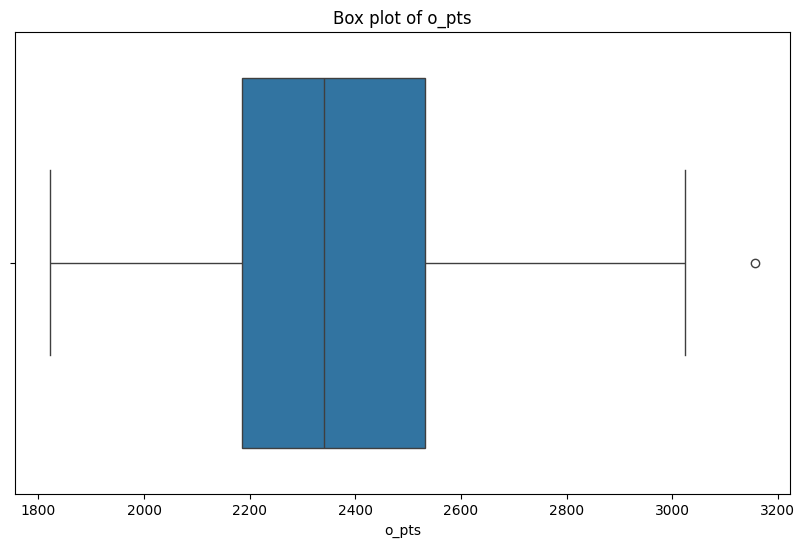

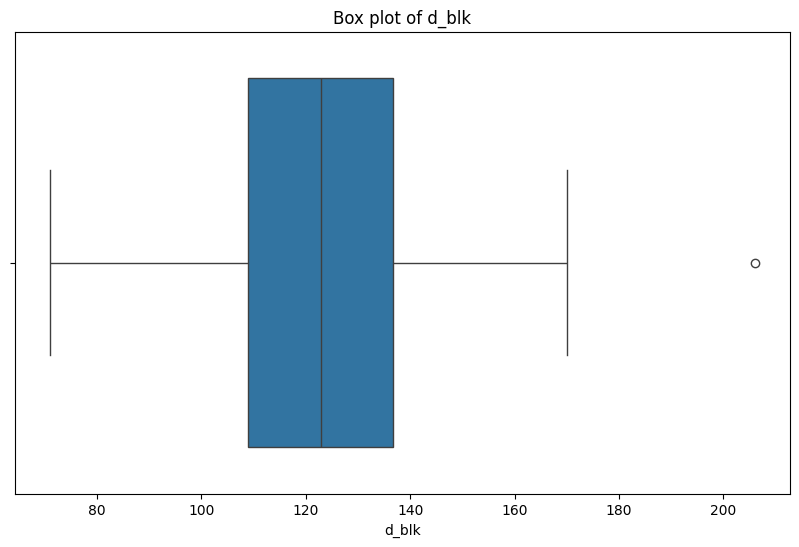

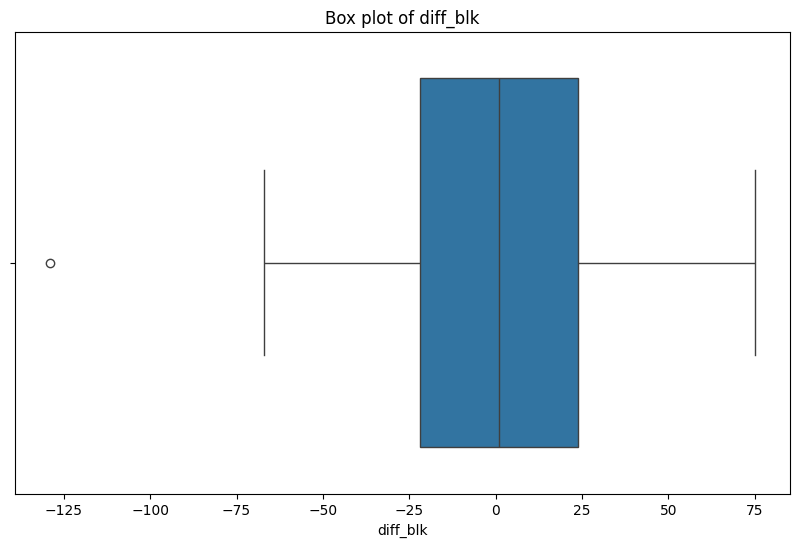

mean_diff_reb      0.363968
mean_diff_awayW    0.353762
mean_diff_dreb     0.343081
mean_diff_won      0.338469
diff_reb           0.337612
                     ...   
diff_tmDRB              NaN
diff_tmTRB              NaN
mean_diff_tmORB         NaN
mean_diff_tmDRB         NaN
mean_diff_tmTRB         NaN
Name: next_year_playoff, Length: 96, dtype: float64
Correlation With WinPercentage
0.2959574446046357
Best Accuracy: 0.78 with K-Nearest Neighbors using top 25 features
Selected features: ['won' 'lost' 'awayW' 'awayL' 'confW' 'confL' 'W' 'L' 'diff_dreb'
 'diff_reb' 'diff_asts' 'diff_pts' 'diff_won' 'diff_awayW' 'diff_confW'
 'mean_diff_fgm' 'mean_diff_dreb' 'mean_diff_reb' 'mean_diff_asts'
 'mean_diff_pts' 'mean_diff_won' 'mean_diff_homeW' 'mean_diff_awayW'
 'mean_diff_confW' 'winPercentage']
WinPercentage
Team ID: ATL, Year: 9, Win Percentage: 11.76%
Team ID: ATL, Year: 10, Win Percentage: 52.94%
Team ID: CHA, Year: 1, Win Percentage: 25.00%
Team ID: CHA, Year: 2, Win Percentage: 56

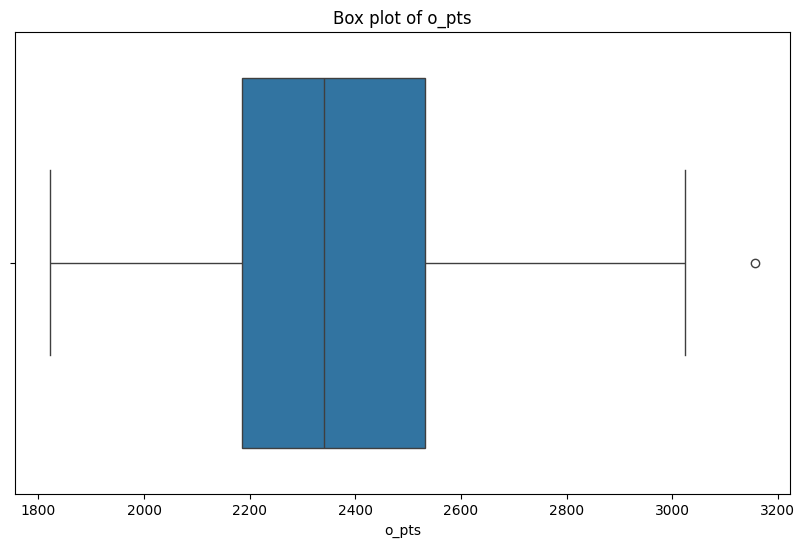

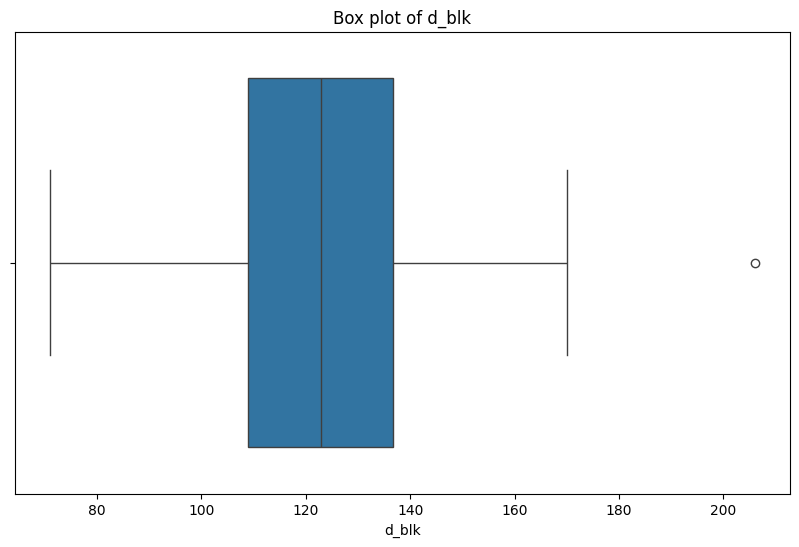

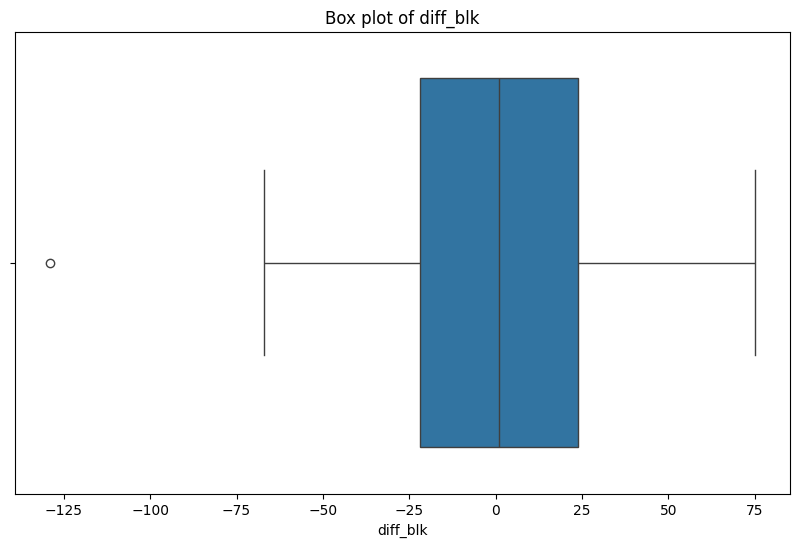

mean_diff_reb      0.363968
mean_diff_awayW    0.353762
mean_diff_dreb     0.343081
mean_diff_won      0.338469
diff_reb           0.337612
                     ...   
diff_tmDRB              NaN
diff_tmTRB              NaN
mean_diff_tmORB         NaN
mean_diff_tmDRB         NaN
mean_diff_tmTRB         NaN
Name: next_year_playoff, Length: 96, dtype: float64
Correlation With WinPercentage
0.2959574446046357
Best Accuracy: 0.78 with K-Nearest Neighbors using top 25 features
Selected features: ['won' 'lost' 'awayW' 'awayL' 'confW' 'confL' 'W' 'L' 'diff_dreb'
 'diff_reb' 'diff_asts' 'diff_pts' 'diff_won' 'diff_awayW' 'diff_confW'
 'mean_diff_fgm' 'mean_diff_dreb' 'mean_diff_reb' 'mean_diff_asts'
 'mean_diff_pts' 'mean_diff_won' 'mean_diff_homeW' 'mean_diff_awayW'
 'mean_diff_confW' 'winPercentage']
Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validated accuracy for K-Nearest Neighbors: 0.64
K-Nearest Neighbors Accuracy 

In [ ]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.feature_selection import SelectKBest, f_classif



warnings.filterwarnings("ignore")





# Load all CSV files
awards_players = pd.read_csv("basketballPlayoffs/awards_players.csv")
coaches = pd.read_csv("basketballPlayoffs/coaches.csv")
players = pd.read_csv("basketballPlayoffs/players.csv")
players_teams = pd.read_csv("basketballPlayoffs/players_teams.csv")
series_post = pd.read_csv("basketballPlayoffs/series_post.csv")
teams = pd.read_csv("basketballPlayoffs/teams.csv")
teams_post = pd.read_csv("basketballPlayoffs/teams_post.csv")


# merge awards_players, players, players_teams and coaches on 
# players_awards and coaches_awards


players_awards = pd.merge(players_teams, awards_players, on=['playerID', 'year'], how='left')
players_awards = pd.merge(players_awards, players, left_on='playerID', right_on='bioID', how='left')
players_awards = players_awards.drop(columns=['bioID'])

# Convert birthDate to datetime
players_awards['birthDate'] = pd.to_datetime(players_awards['birthDate'])

# Calculate age
current_date = datetime.now()
players_awards['age'] = players_awards['birthDate'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

# Drop the birthDate column if no longer needed
players_awards.drop(columns=['birthDate'], inplace=True)


coaches_awards = pd.merge(coaches, awards_players, left_on=['coachID', 'year'], right_on=['playerID', 'year'], how='left')
coaches_awards = coaches_awards.drop(columns=['playerID'])





players_awards.to_csv('novos/players_awards.csv', index=False)
coaches_awards.to_csv('novos/coaches_awards.csv', index=False)





# Merge the two DataFrames on "year" and "tmID"
teams = pd.merge(teams, teams_post[['year', 'tmID', 'W', 'L']], on=['year', 'tmID'], how='left')

# Fill missing "W" and "L" values with 0
teams['W'] = teams['W'].fillna(0)
teams['L'] = teams['L'].fillna(0)


teams.to_csv('novos/teams.csv', index=False)


# return team with tmID and year
def get_team(tmID, year):
    return teams[(teams['tmID'] == tmID) & (teams['year'] == year)]


# make a script that for each team (year, tmID) search if the players of that team had any awards in the same year, if so add a column to the team dataframe with the number of awards
def add_awards_to_teams():
    teams['awards'] = 0
    for index, team in teams.iterrows():
        tmID = team['tmID']
        year = team['year']
        team_players = players_awards[(players_awards['tmID'] == tmID) & (players_awards['year'] == year)]
        awards = team_players['award'].count()
        teams.loc[index, 'awards'] = awards

        coaches_team = coaches_awards[(coaches_awards['tmID'] == tmID) & (coaches_awards['year'] == year)]
        awards = coaches_team['award'].count()
        teams.loc[index, 'awards'] += awards

        #if (coaches_team['award'] == 'Coach of the Year').any():
            #teams.loc[index, 'awards'] += 50


    teams.to_csv('novos/teams.csv', index=False)


add_awards_to_teams()



# Convert "playoff" feature to numeric (assuming "Y" for yes and "N" for no)
teams['playoff'] = teams['playoff'].apply(lambda x: 1 if x == 'Y' else 0)








teams['diff_fgm'] = teams['o_fgm'] - teams['d_fgm']
teams['diff_fga'] = teams['o_fga'] - teams['d_fga']

teams['diff_ftm'] = teams['o_ftm'] - teams['d_ftm']
teams['diff_fta'] = teams['o_fta'] - teams['d_fta']

teams['diff_3pm'] = teams['o_3pm'] - teams['d_3pm']
teams['diff_3pa'] = teams['o_3pa'] - teams['d_3pa']

teams['diff_oreb'] = teams['o_oreb'] - teams['d_oreb']
teams['diff_dreb'] = teams['o_dreb'] - teams['d_dreb']

teams['diff_reb'] = teams['o_reb'] - teams['d_reb']
teams['diff_asts'] = teams['o_asts'] - teams['d_asts']

teams['diff_pf'] = teams['o_pf'] - teams['d_pf']
teams['diff_stl'] = teams['o_stl'] - teams['d_stl']

teams['diff_to'] = teams['o_to'] - teams['d_to']
teams['diff_blk'] = teams['o_blk'] - teams['d_blk']

teams['diff_pts'] = teams['o_pts'] - teams['d_pts']
teams['diff_tmORB'] = teams['tmORB'] - teams['opptmORB']

teams['diff_tmDRB'] = teams['tmDRB'] - teams['opptmDRB']
teams['diff_tmTRB'] = teams['tmTRB'] - teams['opptmTRB']

teams['diff_won'] = teams['won'] - teams['lost']


teams['diff_homeW'] = teams['homeW'] - teams['homeL']
teams['diff_awayW'] = teams['awayW'] - teams['awayL']

teams['diff_confW'] = teams['confW'] - teams['confL']
teams['diff_W'] = teams['W'] - teams['L']


yearly_stats = {}

for year, year_data in teams.groupby('year'):
  
    year_dict = {}

    for index, row in year_data.iterrows():
        # offensive stats
        offensiveFieldGoalPercentage = (row['o_fgm'] / row['o_fga']) * 100

        # Update max and min for each stat per year
        year_dict.setdefault('offensiveFieldGoalPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveFieldGoalPercentage']['max'] = max(year_dict['offensiveFieldGoalPercentage']['max'], offensiveFieldGoalPercentage)
        year_dict['offensiveFieldGoalPercentage']['min'] = min(year_dict['offensiveFieldGoalPercentage']['min'], offensiveFieldGoalPercentage)

        offensiveFreeThrowPercentage = (row['o_ftm'] / row['o_fta']) * 100

        year_dict.setdefault('offensiveFreeThrowPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveFreeThrowPercentage']['max'] = max(year_dict['offensiveFreeThrowPercentage']['max'], offensiveFreeThrowPercentage)
        year_dict['offensiveFreeThrowPercentage']['min'] = min(year_dict['offensiveFreeThrowPercentage']['min'], offensiveFreeThrowPercentage)


        offensiveThreePointPercentage = (row['o_3pm'] / row['o_3pa']) * 100

        year_dict.setdefault('offensiveThreePointPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveThreePointPercentage']['max'] = max(year_dict['offensiveThreePointPercentage']['max'], offensiveThreePointPercentage)
        year_dict['offensiveThreePointPercentage']['min'] = min(year_dict['offensiveThreePointPercentage']['min'], offensiveThreePointPercentage)


        offensiveReboundsPerGame = row['o_reb'] / row['GP']

        year_dict.setdefault('offensiveReboundsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveReboundsPerGame']['max'] = max(year_dict['offensiveReboundsPerGame']['max'], offensiveReboundsPerGame)
        year_dict['offensiveReboundsPerGame']['min'] = min(year_dict['offensiveReboundsPerGame']['min'], offensiveReboundsPerGame)


        offensiveAssistsPerGame = row['o_asts'] / row['GP']

        year_dict.setdefault('offensiveAssistsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveAssistsPerGame']['max'] = max(year_dict['offensiveAssistsPerGame']['max'], offensiveAssistsPerGame)
        year_dict['offensiveAssistsPerGame']['min'] = min(year_dict['offensiveAssistsPerGame']['min'], offensiveAssistsPerGame)

        offensivePersonalFoulsPerGame = row['o_pf'] / row['GP']

        year_dict.setdefault('offensivePersonalFoulsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensivePersonalFoulsPerGame']['max'] = max(year_dict['offensivePersonalFoulsPerGame']['max'], offensivePersonalFoulsPerGame)
        year_dict['offensivePersonalFoulsPerGame']['min'] = min(year_dict['offensivePersonalFoulsPerGame']['min'], offensivePersonalFoulsPerGame)

        offensiveStealsPerGame = row['o_stl'] / row['GP']

        year_dict.setdefault('offensiveStealsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveStealsPerGame']['max'] = max(year_dict['offensiveStealsPerGame']['max'], offensiveStealsPerGame)
        year_dict['offensiveStealsPerGame']['min'] = min(year_dict['offensiveStealsPerGame']['min'], offensiveStealsPerGame)

        offensiveTurnoversPerGame = row['o_to'] / row['GP']

        year_dict.setdefault('offensiveTurnoversPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveTurnoversPerGame']['max'] = max(year_dict['offensiveTurnoversPerGame']['max'], offensiveTurnoversPerGame)
        year_dict['offensiveTurnoversPerGame']['min'] = min(year_dict['offensiveTurnoversPerGame']['min'], offensiveTurnoversPerGame)

        offensiveBlocksPerGame = row['o_blk'] / row['GP']

        year_dict.setdefault('offensiveBlocksPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveBlocksPerGame']['max'] = max(year_dict['offensiveBlocksPerGame']['max'], offensiveBlocksPerGame)
        year_dict['offensiveBlocksPerGame']['min'] = min(year_dict['offensiveBlocksPerGame']['min'], offensiveBlocksPerGame)

        offensivePointsPerGame = row['o_pts'] / row['GP']

        year_dict.setdefault('offensivePointsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensivePointsPerGame']['max'] = max(year_dict['offensivePointsPerGame']['max'], offensivePointsPerGame)
        year_dict['offensivePointsPerGame']['min'] = min(year_dict['offensivePointsPerGame']['min'], offensivePointsPerGame)

        # defensive stats
        defensiveFieldGoalPercentage = (row['d_fgm'] / row['d_fga']) * 100

        year_dict.setdefault('defensiveFieldGoalPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveFieldGoalPercentage']['max'] = max(year_dict['defensiveFieldGoalPercentage']['max'], defensiveFieldGoalPercentage)
        year_dict['defensiveFieldGoalPercentage']['min'] = min(year_dict['defensiveFieldGoalPercentage']['min'], defensiveFieldGoalPercentage)

        defensiveFreeThrowPercentage = (row['d_ftm'] / row['d_fta']) * 100

        year_dict.setdefault('defensiveFreeThrowPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveFreeThrowPercentage']['max'] = max(year_dict['defensiveFreeThrowPercentage']['max'], defensiveFreeThrowPercentage)
        year_dict['defensiveFreeThrowPercentage']['min'] = min(year_dict['defensiveFreeThrowPercentage']['min'], defensiveFreeThrowPercentage)

        defensiveThreePointPercentage = (row['d_3pm'] / row['d_3pa']) * 100

        year_dict.setdefault('defensiveThreePointPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveThreePointPercentage']['max'] = max(year_dict['defensiveThreePointPercentage']['max'], defensiveThreePointPercentage)
        year_dict['defensiveThreePointPercentage']['min'] = min(year_dict['defensiveThreePointPercentage']['min'], defensiveThreePointPercentage)

        defensiveReboundsPerGame = row['d_reb'] / row['GP']

        year_dict.setdefault('defensiveReboundsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveReboundsPerGame']['max'] = max(year_dict['defensiveReboundsPerGame']['max'], defensiveReboundsPerGame)
        year_dict['defensiveReboundsPerGame']['min'] = min(year_dict['defensiveReboundsPerGame']['min'], defensiveReboundsPerGame)

        defensiveAssistsPerGame = row['d_asts'] / row['GP']

        year_dict.setdefault('defensiveAssistsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveAssistsPerGame']['max'] = max(year_dict['defensiveAssistsPerGame']['max'], defensiveAssistsPerGame)
        year_dict['defensiveAssistsPerGame']['min'] = min(year_dict['defensiveAssistsPerGame']['min'], defensiveAssistsPerGame)

        defensivePersonalFoulsPerGame = row['d_pf'] / row['GP']

        year_dict.setdefault('defensivePersonalFoulsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensivePersonalFoulsPerGame']['max'] = max(year_dict['defensivePersonalFoulsPerGame']['max'], defensivePersonalFoulsPerGame)
        year_dict['defensivePersonalFoulsPerGame']['min'] = min(year_dict['defensivePersonalFoulsPerGame']['min'], defensivePersonalFoulsPerGame)

        defensiveStealsPerGame = row['d_stl'] / row['GP']

        year_dict.setdefault('defensiveStealsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveStealsPerGame']['max'] = max(year_dict['defensiveStealsPerGame']['max'], defensiveStealsPerGame)
        year_dict['defensiveStealsPerGame']['min'] = min(year_dict['defensiveStealsPerGame']['min'], defensiveStealsPerGame)

        defensiveTurnoversPerGame = row['d_to'] / row['GP']

        year_dict.setdefault('defensiveTurnoversPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveTurnoversPerGame']['max'] = max(year_dict['defensiveTurnoversPerGame']['max'], defensiveTurnoversPerGame)
        year_dict['defensiveTurnoversPerGame']['min'] = min(year_dict['defensiveTurnoversPerGame']['min'], defensiveTurnoversPerGame)

        defensiveBlocksPerGame = row['d_blk'] / row['GP']

        year_dict.setdefault('defensiveBlocksPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveBlocksPerGame']['max'] = max(year_dict['defensiveBlocksPerGame']['max'], defensiveBlocksPerGame)
        year_dict['defensiveBlocksPerGame']['min'] = min(year_dict['defensiveBlocksPerGame']['min'], defensiveBlocksPerGame)

        defensivePointsPerGame = row['d_pts'] / row['GP']

        year_dict.setdefault('defensivePointsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensivePointsPerGame']['max'] = max(year_dict['defensivePointsPerGame']['max'], defensivePointsPerGame)
        year_dict['defensivePointsPerGame']['min'] = min(year_dict['defensivePointsPerGame']['min'], defensivePointsPerGame)

        winPercentage = row['won'] / row['GP'] * 100

        year_dict.setdefault('winPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['winPercentage']['max'] = max(year_dict['winPercentage']['max'], winPercentage)
        year_dict['winPercentage']['min'] = min(year_dict['winPercentage']['min'], winPercentage)

        homeWinPercentage = row['homeW'] / (row['homeW'] + row['homeL']) * 100

        year_dict.setdefault('homeWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['homeWinPercentage']['max'] = max(year_dict['homeWinPercentage']['max'], homeWinPercentage)
        year_dict['homeWinPercentage']['min'] = min(year_dict['homeWinPercentage']['min'], homeWinPercentage)

        awayWinPercentage = row['awayW'] / (row['awayW'] + row['awayL']) * 100

        year_dict.setdefault('awayWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['awayWinPercentage']['max'] = max(year_dict['awayWinPercentage']['max'], awayWinPercentage)
        year_dict['awayWinPercentage']['min'] = min(year_dict['awayWinPercentage']['min'], awayWinPercentage)

        conferenceWinPercentage = row['confW'] / (row['confW'] + row['confL']) * 100

        year_dict.setdefault('conferenceWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['conferenceWinPercentage']['max'] = max(year_dict['conferenceWinPercentage']['max'], conferenceWinPercentage)
        year_dict['conferenceWinPercentage']['min'] = min(year_dict['conferenceWinPercentage']['min'], conferenceWinPercentage)

        attendance = row['attend']

        year_dict.setdefault('attendance', {'max': -float('inf'), 'min': float('inf')})
        year_dict['attendance']['max'] = max(year_dict['attendance']['max'], attendance)
        year_dict['attendance']['min'] = min(year_dict['attendance']['min'], attendance)

        rank = row['rank']

        year_dict.setdefault('rank', {'max': -float('inf'), 'min': float('inf')})
        year_dict['rank']['max'] = max(year_dict['rank']['max'], rank)
        year_dict['rank']['min'] = min(year_dict['rank']['min'], rank)

        o_oreb = row['o_oreb']

        year_dict.setdefault('o_oreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['o_oreb']['max'] = max(year_dict['o_oreb']['max'], o_oreb)
        year_dict['o_oreb']['min'] = min(year_dict['o_oreb']['min'], o_oreb)

        o_dreb = row['o_dreb']

        year_dict.setdefault('o_dreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['o_dreb']['max'] = max(year_dict['o_dreb']['max'], o_dreb)
        year_dict['o_dreb']['min'] = min(year_dict['o_dreb']['min'], o_dreb)

        d_oreb = row['d_oreb']

        year_dict.setdefault('d_oreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['d_oreb']['max'] = max(year_dict['d_oreb']['max'], d_oreb)
        year_dict['d_oreb']['min'] = min(year_dict['d_oreb']['min'], d_oreb)

        d_dreb = row['d_dreb']

        year_dict.setdefault('d_dreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['d_dreb']['max'] = max(year_dict['d_dreb']['max'], d_dreb)
        year_dict['d_dreb']['min'] = min(year_dict['d_dreb']['min'], d_dreb)

    yearly_stats[year] = year_dict






teams['winPercentage'] = teams['won'] / teams['GP'] * 100




print("WinPercentage")

for index, row in teams.iterrows():

    year = row['year']
    teams['winPercentage'] = teams['won'] / teams['GP'] * 100
    teams['winPercentage'] = (teams['winPercentage'] - yearly_stats[year]['winPercentage']['min']) / (
        yearly_stats[year]['winPercentage']['max'] - yearly_stats[year]['winPercentage']['min']) * 100






    print(f"Team ID: {row['tmID']}, Year: {row['year']}, Win Percentage: {row['winPercentage']:.2f}%")





# create new columns with mean of diff features from the current and the previsous year
def add_mean_diff_features(years=2):
    for index, team in teams.iterrows():
        tmID = team['tmID']
        year = team['year']
        diffs = {feature: [] for feature in ['diff_fgm', 'diff_fga', 'diff_ftm', 'diff_fta', 'diff_3pm', 'diff_3pa', 'diff_oreb', 'diff_dreb', 'diff_reb', 'diff_asts', 'diff_pf', 'diff_stl', 'diff_to', 'diff_blk', 'diff_pts', 'diff_tmORB', 'diff_tmDRB', 'diff_tmTRB', 'diff_won', 'diff_homeW', 'diff_awayW', 'diff_confW', 'diff_W']}
        
        for i in range(0, years):
            previous_year = year - i
            previous_team = get_team(tmID, previous_year)
            if not previous_team.empty:
                for feature in diffs.keys():
                    diffs[feature].append(previous_team[feature].values[0])
        
        for feature, values in diffs.items():
            if values:
                teams.loc[index, f'mean_{feature}'] = (team[feature] + sum(values)) / (len(values) + 1)
            else:
                teams.loc[index, f'mean_{feature}'] = team[feature]

# Example usage:
add_mean_diff_features(years=2)

# newly created features in a list
new_features = ['mean_diff_fgm', 'mean_diff_fga', 'mean_diff_ftm', 'mean_diff_fta', 'mean_diff_3pm', 'mean_diff_3pa', 'mean_diff_oreb', 'mean_diff_dreb', 'mean_diff_reb', 'mean_diff_asts', 'mean_diff_pf', 'mean_diff_stl', 'mean_diff_to', 'mean_diff_blk', 'mean_diff_pts', 'mean_diff_tmORB', 'mean_diff_tmDRB', 'mean_diff_tmTRB', 'mean_diff_won', 'mean_diff_homeW', 'mean_diff_awayW', 'mean_diff_confW', 'mean_diff_W']







# check correlation between features and playoff
features = ["o_fgm", "o_fga", "o_ftm", "o_fta", "o_3pm", "o_3pa", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl", "o_to", "o_blk", "o_pts", "d_fgm", "d_fga", "d_ftm", "d_fta", "d_3pm", "d_3pa", "d_oreb", "d_dreb", "d_reb", "d_asts", "d_pf", "d_stl", "d_to", "d_blk", "d_pts", "tmORB", "tmDRB", "tmTRB", "opptmORB", "opptmDRB", "opptmTRB", "won", "lost", "GP", "homeW", "homeL", "awayW", "awayL", "confW", "confL", "min", "attend", "W", "L", "awards",'diff_fgm', 'diff_fga', 'diff_ftm', 'diff_fta', 'diff_3pm', 'diff_3pa', 'diff_oreb', 'diff_dreb', 'diff_reb', 'diff_asts', 'diff_pf', 'diff_stl', 'diff_to', 'diff_blk', 'diff_pts','diff_tmORB', 'diff_tmDRB', 'diff_tmTRB', 'diff_won', 'diff_homeW', 'diff_awayW', 'diff_confW']
features.extend(new_features)
features.extend(['winPercentage'])


original_features = ["o_fgm", "o_fga", "o_ftm", "o_fta", "o_3pm", "o_3pa", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl", "o_to", "o_blk", "o_pts", "d_fgm", "d_fga", "d_ftm", "d_fta", "d_3pm", "d_3pa", "d_oreb", "d_dreb", "d_reb", "d_asts", "d_pf", "d_stl", "d_to", "d_blk", "d_pts", "tmORB", "tmDRB", "tmTRB", "opptmORB", "opptmDRB", "opptmTRB", "won", "lost", "GP", "homeW", "homeL", "awayW", "awayL", "confW", "confL", "min", "attend", "W", "L"]

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, features, threshold=3):
    outliers = {}
    for feature in features:
        mean = np.mean(df[feature])
        std_dev = np.std(df[feature])
        z_scores = (df[feature] - mean) / std_dev
        outliers[feature] = df[np.abs(z_scores) > threshold]
    return outliers

# Detect outliers
outliers = detect_outliers_zscore(teams, original_features)

# Print outliers for each feature
for feature, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"Outliers detected in feature '{feature}':")
        print(outlier_df[[feature]])
        print("\n")



# Plot box plots for the features with detected outliers
features_with_outliers = ['o_pts', 'd_blk', 'diff_blk']

for feature in features_with_outliers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=teams[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()







# Ensure the dataset is ordered by tmID and year
teams = teams.sort_values(by=['tmID', 'year'])


# Create a new column for next year's playoff status
teams['next_year_playoff'] = teams.groupby('tmID')['playoff'].shift(-1)

teams.to_csv('novos/teams.csv', index=False)

# Calculate the correlation matrix
correlation_matrix = teams[features + ['next_year_playoff']].corr()

# Extract the correlation of each feature with 'next_year_playoff'
correlation_with_target = correlation_matrix['next_year_playoff'].drop('next_year_playoff')

# Print the correlations
# ordered by the correlation value
correlation_with_target = correlation_with_target.sort_values(ascending=False)
print(correlation_with_target)

print("Correlation With WinPercentage")
print(correlation_with_target['winPercentage'])


# print to a csv for year 1 what teams made the playoffs in year 2
def print_playoffs(year):
    year_1_df = teams[teams['year'] == year]
    playoff_teams = year_1_df
    playoff_teams = playoff_teams[['tmID', 'year', 'playoff','diff_pts','next_year_playoff']]
    playoff_teams = playoff_teams.sort_values(by='diff_pts', ascending=False)
    playoff_teams.to_csv(f'winners/playoffs_{year}.csv', index=False)


print_playoffs(1)
print_playoffs(2)
print_playoffs(3)
print_playoffs(4)
print_playoffs(5)
print_playoffs(6)
print_playoffs(7)
print_playoffs(8)
print_playoffs(9)
print_playoffs(10)





#print p_point in teams per team and per year
def print_p_points(name, year):
    team = get_team(name, year)
    print(f'{name} in {year} has {team["o_pts"].values[0]} points')


#print_p_points('ATL', 10)

'''
correlation_matrix = teams[features + ['playoff']].corr()

correlation_with_target = correlation_matrix['playoff'].drop('playoff')

print(correlation_with_target)
'''




# try to train a model
# Split the data into training and testing sets based on year
df = teams[(teams['year'] <= 9) & (teams['year'] >= 3)]

df = df.dropna(subset=['next_year_playoff'])

# Split the data into features (X) and target (y)
X = df[features]
y = df['next_year_playoff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of values for k (number of top features to select)
k_values = range(1, len(features) + 1)

# Define a list of models to try
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Initialize variables to keep track of the best accuracy, model, k, and features
best_accuracy = 0
best_model_name = ''
best_k = 0
best_features = []

# Loop through each model and each value of k
for model_name, model in models:
    for k in k_values:
        # Select the best features
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)

        # Train the model
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, predictions)
        #print(f'{model_name} Accuracy with top {k} features: {accuracy:.2f}')

        # Check if this is the best accuracy so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = model_name
            best_k = k
            best_features = np.array(features)[selector.get_support()]

# Print the best accuracy, model, k, and selected features
print(f'Best Accuracy: {best_accuracy:.2f} with {best_model_name} using top {best_k} features')
print(f'Selected features: {best_features}')




import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.feature_selection import SelectKBest, f_classif



warnings.filterwarnings("ignore")





# Load all CSV files
awards_players = pd.read_csv("basketballPlayoffs/awards_players.csv")
coaches = pd.read_csv("basketballPlayoffs/coaches.csv")
players = pd.read_csv("basketballPlayoffs/players.csv")
players_teams = pd.read_csv("basketballPlayoffs/players_teams.csv")
series_post = pd.read_csv("basketballPlayoffs/series_post.csv")
teams = pd.read_csv("basketballPlayoffs/teams.csv")
teams_post = pd.read_csv("basketballPlayoffs/teams_post.csv")


# merge awards_players, players, players_teams and coaches on 
# players_awards and coaches_awards


players_awards = pd.merge(players_teams, awards_players, on=['playerID', 'year'], how='left')
players_awards = pd.merge(players_awards, players, left_on='playerID', right_on='bioID', how='left')
players_awards = players_awards.drop(columns=['bioID'])

# Convert birthDate to datetime
players_awards['birthDate'] = pd.to_datetime(players_awards['birthDate'])

# Calculate age
current_date = datetime.now()
players_awards['age'] = players_awards['birthDate'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

# Drop the birthDate column if no longer needed
players_awards.drop(columns=['birthDate'], inplace=True)


coaches_awards = pd.merge(coaches, awards_players, left_on=['coachID', 'year'], right_on=['playerID', 'year'], how='left')
coaches_awards = coaches_awards.drop(columns=['playerID'])





players_awards.to_csv('novos/players_awards.csv', index=False)
coaches_awards.to_csv('novos/coaches_awards.csv', index=False)





# Merge the two DataFrames on "year" and "tmID"
teams = pd.merge(teams, teams_post[['year', 'tmID', 'W', 'L']], on=['year', 'tmID'], how='left')

# Fill missing "W" and "L" values with 0
teams['W'] = teams['W'].fillna(0)
teams['L'] = teams['L'].fillna(0)


teams.to_csv('novos/teams.csv', index=False)


# return team with tmID and year
def get_team(tmID, year):
    return teams[(teams['tmID'] == tmID) & (teams['year'] == year)]


# make a script that for each team (year, tmID) search if the players of that team had any awards in the same year, if so add a column to the team dataframe with the number of awards
def add_awards_to_teams():
    teams['awards'] = 0
    for index, team in teams.iterrows():
        tmID = team['tmID']
        year = team['year']
        team_players = players_awards[(players_awards['tmID'] == tmID) & (players_awards['year'] == year)]
        awards = team_players['award'].count()
        teams.loc[index, 'awards'] = awards

        coaches_team = coaches_awards[(coaches_awards['tmID'] == tmID) & (coaches_awards['year'] == year)]
        awards = coaches_team['award'].count()
        teams.loc[index, 'awards'] += awards

        #if (coaches_team['award'] == 'Coach of the Year').any():
            #teams.loc[index, 'awards'] += 50


    teams.to_csv('novos/teams.csv', index=False)


add_awards_to_teams()



# Convert "playoff" feature to numeric (assuming "Y" for yes and "N" for no)
teams['playoff'] = teams['playoff'].apply(lambda x: 1 if x == 'Y' else 0)








teams['diff_fgm'] = teams['o_fgm'] - teams['d_fgm']
teams['diff_fga'] = teams['o_fga'] - teams['d_fga']

teams['diff_ftm'] = teams['o_ftm'] - teams['d_ftm']
teams['diff_fta'] = teams['o_fta'] - teams['d_fta']

teams['diff_3pm'] = teams['o_3pm'] - teams['d_3pm']
teams['diff_3pa'] = teams['o_3pa'] - teams['d_3pa']

teams['diff_oreb'] = teams['o_oreb'] - teams['d_oreb']
teams['diff_dreb'] = teams['o_dreb'] - teams['d_dreb']

teams['diff_reb'] = teams['o_reb'] - teams['d_reb']
teams['diff_asts'] = teams['o_asts'] - teams['d_asts']

teams['diff_pf'] = teams['o_pf'] - teams['d_pf']
teams['diff_stl'] = teams['o_stl'] - teams['d_stl']

teams['diff_to'] = teams['o_to'] - teams['d_to']
teams['diff_blk'] = teams['o_blk'] - teams['d_blk']

teams['diff_pts'] = teams['o_pts'] - teams['d_pts']
teams['diff_tmORB'] = teams['tmORB'] - teams['opptmORB']

teams['diff_tmDRB'] = teams['tmDRB'] - teams['opptmDRB']
teams['diff_tmTRB'] = teams['tmTRB'] - teams['opptmTRB']

teams['diff_won'] = teams['won'] - teams['lost']


teams['diff_homeW'] = teams['homeW'] - teams['homeL']
teams['diff_awayW'] = teams['awayW'] - teams['awayL']

teams['diff_confW'] = teams['confW'] - teams['confL']
teams['diff_W'] = teams['W'] - teams['L']


yearly_stats = {}

for year, year_data in teams.groupby('year'):
  
    year_dict = {}

    for index, row in year_data.iterrows():
        # offensive stats
        offensiveFieldGoalPercentage = (row['o_fgm'] / row['o_fga']) * 100

        # Update max and min for each stat per year
        year_dict.setdefault('offensiveFieldGoalPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveFieldGoalPercentage']['max'] = max(year_dict['offensiveFieldGoalPercentage']['max'], offensiveFieldGoalPercentage)
        year_dict['offensiveFieldGoalPercentage']['min'] = min(year_dict['offensiveFieldGoalPercentage']['min'], offensiveFieldGoalPercentage)

        offensiveFreeThrowPercentage = (row['o_ftm'] / row['o_fta']) * 100

        year_dict.setdefault('offensiveFreeThrowPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveFreeThrowPercentage']['max'] = max(year_dict['offensiveFreeThrowPercentage']['max'], offensiveFreeThrowPercentage)
        year_dict['offensiveFreeThrowPercentage']['min'] = min(year_dict['offensiveFreeThrowPercentage']['min'], offensiveFreeThrowPercentage)


        offensiveThreePointPercentage = (row['o_3pm'] / row['o_3pa']) * 100

        year_dict.setdefault('offensiveThreePointPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveThreePointPercentage']['max'] = max(year_dict['offensiveThreePointPercentage']['max'], offensiveThreePointPercentage)
        year_dict['offensiveThreePointPercentage']['min'] = min(year_dict['offensiveThreePointPercentage']['min'], offensiveThreePointPercentage)


        offensiveReboundsPerGame = row['o_reb'] / row['GP']

        year_dict.setdefault('offensiveReboundsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveReboundsPerGame']['max'] = max(year_dict['offensiveReboundsPerGame']['max'], offensiveReboundsPerGame)
        year_dict['offensiveReboundsPerGame']['min'] = min(year_dict['offensiveReboundsPerGame']['min'], offensiveReboundsPerGame)


        offensiveAssistsPerGame = row['o_asts'] / row['GP']

        year_dict.setdefault('offensiveAssistsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveAssistsPerGame']['max'] = max(year_dict['offensiveAssistsPerGame']['max'], offensiveAssistsPerGame)
        year_dict['offensiveAssistsPerGame']['min'] = min(year_dict['offensiveAssistsPerGame']['min'], offensiveAssistsPerGame)

        offensivePersonalFoulsPerGame = row['o_pf'] / row['GP']

        year_dict.setdefault('offensivePersonalFoulsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensivePersonalFoulsPerGame']['max'] = max(year_dict['offensivePersonalFoulsPerGame']['max'], offensivePersonalFoulsPerGame)
        year_dict['offensivePersonalFoulsPerGame']['min'] = min(year_dict['offensivePersonalFoulsPerGame']['min'], offensivePersonalFoulsPerGame)

        offensiveStealsPerGame = row['o_stl'] / row['GP']

        year_dict.setdefault('offensiveStealsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveStealsPerGame']['max'] = max(year_dict['offensiveStealsPerGame']['max'], offensiveStealsPerGame)
        year_dict['offensiveStealsPerGame']['min'] = min(year_dict['offensiveStealsPerGame']['min'], offensiveStealsPerGame)

        offensiveTurnoversPerGame = row['o_to'] / row['GP']

        year_dict.setdefault('offensiveTurnoversPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveTurnoversPerGame']['max'] = max(year_dict['offensiveTurnoversPerGame']['max'], offensiveTurnoversPerGame)
        year_dict['offensiveTurnoversPerGame']['min'] = min(year_dict['offensiveTurnoversPerGame']['min'], offensiveTurnoversPerGame)

        offensiveBlocksPerGame = row['o_blk'] / row['GP']

        year_dict.setdefault('offensiveBlocksPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveBlocksPerGame']['max'] = max(year_dict['offensiveBlocksPerGame']['max'], offensiveBlocksPerGame)
        year_dict['offensiveBlocksPerGame']['min'] = min(year_dict['offensiveBlocksPerGame']['min'], offensiveBlocksPerGame)

        offensivePointsPerGame = row['o_pts'] / row['GP']

        year_dict.setdefault('offensivePointsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensivePointsPerGame']['max'] = max(year_dict['offensivePointsPerGame']['max'], offensivePointsPerGame)
        year_dict['offensivePointsPerGame']['min'] = min(year_dict['offensivePointsPerGame']['min'], offensivePointsPerGame)

        # defensive stats
        defensiveFieldGoalPercentage = (row['d_fgm'] / row['d_fga']) * 100

        year_dict.setdefault('defensiveFieldGoalPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveFieldGoalPercentage']['max'] = max(year_dict['defensiveFieldGoalPercentage']['max'], defensiveFieldGoalPercentage)
        year_dict['defensiveFieldGoalPercentage']['min'] = min(year_dict['defensiveFieldGoalPercentage']['min'], defensiveFieldGoalPercentage)

        defensiveFreeThrowPercentage = (row['d_ftm'] / row['d_fta']) * 100

        year_dict.setdefault('defensiveFreeThrowPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveFreeThrowPercentage']['max'] = max(year_dict['defensiveFreeThrowPercentage']['max'], defensiveFreeThrowPercentage)
        year_dict['defensiveFreeThrowPercentage']['min'] = min(year_dict['defensiveFreeThrowPercentage']['min'], defensiveFreeThrowPercentage)

        defensiveThreePointPercentage = (row['d_3pm'] / row['d_3pa']) * 100

        year_dict.setdefault('defensiveThreePointPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveThreePointPercentage']['max'] = max(year_dict['defensiveThreePointPercentage']['max'], defensiveThreePointPercentage)
        year_dict['defensiveThreePointPercentage']['min'] = min(year_dict['defensiveThreePointPercentage']['min'], defensiveThreePointPercentage)

        defensiveReboundsPerGame = row['d_reb'] / row['GP']

        year_dict.setdefault('defensiveReboundsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveReboundsPerGame']['max'] = max(year_dict['defensiveReboundsPerGame']['max'], defensiveReboundsPerGame)
        year_dict['defensiveReboundsPerGame']['min'] = min(year_dict['defensiveReboundsPerGame']['min'], defensiveReboundsPerGame)

        defensiveAssistsPerGame = row['d_asts'] / row['GP']

        year_dict.setdefault('defensiveAssistsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveAssistsPerGame']['max'] = max(year_dict['defensiveAssistsPerGame']['max'], defensiveAssistsPerGame)
        year_dict['defensiveAssistsPerGame']['min'] = min(year_dict['defensiveAssistsPerGame']['min'], defensiveAssistsPerGame)

        defensivePersonalFoulsPerGame = row['d_pf'] / row['GP']

        year_dict.setdefault('defensivePersonalFoulsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensivePersonalFoulsPerGame']['max'] = max(year_dict['defensivePersonalFoulsPerGame']['max'], defensivePersonalFoulsPerGame)
        year_dict['defensivePersonalFoulsPerGame']['min'] = min(year_dict['defensivePersonalFoulsPerGame']['min'], defensivePersonalFoulsPerGame)

        defensiveStealsPerGame = row['d_stl'] / row['GP']

        year_dict.setdefault('defensiveStealsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveStealsPerGame']['max'] = max(year_dict['defensiveStealsPerGame']['max'], defensiveStealsPerGame)
        year_dict['defensiveStealsPerGame']['min'] = min(year_dict['defensiveStealsPerGame']['min'], defensiveStealsPerGame)

        defensiveTurnoversPerGame = row['d_to'] / row['GP']

        year_dict.setdefault('defensiveTurnoversPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveTurnoversPerGame']['max'] = max(year_dict['defensiveTurnoversPerGame']['max'], defensiveTurnoversPerGame)
        year_dict['defensiveTurnoversPerGame']['min'] = min(year_dict['defensiveTurnoversPerGame']['min'], defensiveTurnoversPerGame)

        defensiveBlocksPerGame = row['d_blk'] / row['GP']

        year_dict.setdefault('defensiveBlocksPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveBlocksPerGame']['max'] = max(year_dict['defensiveBlocksPerGame']['max'], defensiveBlocksPerGame)
        year_dict['defensiveBlocksPerGame']['min'] = min(year_dict['defensiveBlocksPerGame']['min'], defensiveBlocksPerGame)

        defensivePointsPerGame = row['d_pts'] / row['GP']

        year_dict.setdefault('defensivePointsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensivePointsPerGame']['max'] = max(year_dict['defensivePointsPerGame']['max'], defensivePointsPerGame)
        year_dict['defensivePointsPerGame']['min'] = min(year_dict['defensivePointsPerGame']['min'], defensivePointsPerGame)

        winPercentage = row['won'] / row['GP'] * 100

        year_dict.setdefault('winPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['winPercentage']['max'] = max(year_dict['winPercentage']['max'], winPercentage)
        year_dict['winPercentage']['min'] = min(year_dict['winPercentage']['min'], winPercentage)

        homeWinPercentage = row['homeW'] / (row['homeW'] + row['homeL']) * 100

        year_dict.setdefault('homeWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['homeWinPercentage']['max'] = max(year_dict['homeWinPercentage']['max'], homeWinPercentage)
        year_dict['homeWinPercentage']['min'] = min(year_dict['homeWinPercentage']['min'], homeWinPercentage)

        awayWinPercentage = row['awayW'] / (row['awayW'] + row['awayL']) * 100

        year_dict.setdefault('awayWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['awayWinPercentage']['max'] = max(year_dict['awayWinPercentage']['max'], awayWinPercentage)
        year_dict['awayWinPercentage']['min'] = min(year_dict['awayWinPercentage']['min'], awayWinPercentage)

        conferenceWinPercentage = row['confW'] / (row['confW'] + row['confL']) * 100

        year_dict.setdefault('conferenceWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['conferenceWinPercentage']['max'] = max(year_dict['conferenceWinPercentage']['max'], conferenceWinPercentage)
        year_dict['conferenceWinPercentage']['min'] = min(year_dict['conferenceWinPercentage']['min'], conferenceWinPercentage)

        attendance = row['attend']

        year_dict.setdefault('attendance', {'max': -float('inf'), 'min': float('inf')})
        year_dict['attendance']['max'] = max(year_dict['attendance']['max'], attendance)
        year_dict['attendance']['min'] = min(year_dict['attendance']['min'], attendance)

        rank = row['rank']

        year_dict.setdefault('rank', {'max': -float('inf'), 'min': float('inf')})
        year_dict['rank']['max'] = max(year_dict['rank']['max'], rank)
        year_dict['rank']['min'] = min(year_dict['rank']['min'], rank)

        o_oreb = row['o_oreb']

        year_dict.setdefault('o_oreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['o_oreb']['max'] = max(year_dict['o_oreb']['max'], o_oreb)
        year_dict['o_oreb']['min'] = min(year_dict['o_oreb']['min'], o_oreb)

        o_dreb = row['o_dreb']

        year_dict.setdefault('o_dreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['o_dreb']['max'] = max(year_dict['o_dreb']['max'], o_dreb)
        year_dict['o_dreb']['min'] = min(year_dict['o_dreb']['min'], o_dreb)

        d_oreb = row['d_oreb']

        year_dict.setdefault('d_oreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['d_oreb']['max'] = max(year_dict['d_oreb']['max'], d_oreb)
        year_dict['d_oreb']['min'] = min(year_dict['d_oreb']['min'], d_oreb)

        d_dreb = row['d_dreb']

        year_dict.setdefault('d_dreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['d_dreb']['max'] = max(year_dict['d_dreb']['max'], d_dreb)
        year_dict['d_dreb']['min'] = min(year_dict['d_dreb']['min'], d_dreb)

    yearly_stats[year] = year_dict






teams['winPercentage'] = teams['won'] / teams['GP'] * 100




print("WinPercentage")

for index, row in teams.iterrows():

    year = row['year']
    teams['winPercentage'] = teams['won'] / teams['GP'] * 100
    teams['winPercentage'] = (teams['winPercentage'] - yearly_stats[year]['winPercentage']['min']) / (
        yearly_stats[year]['winPercentage']['max'] - yearly_stats[year]['winPercentage']['min']) * 100






    print(f"Team ID: {row['tmID']}, Year: {row['year']}, Win Percentage: {row['winPercentage']:.2f}%")





# create new columns with mean of diff features from the current and the previsous year
def add_mean_diff_features(years=2):
    for index, team in teams.iterrows():
        tmID = team['tmID']
        year = team['year']
        diffs = {feature: [] for feature in ['diff_fgm', 'diff_fga', 'diff_ftm', 'diff_fta', 'diff_3pm', 'diff_3pa', 'diff_oreb', 'diff_dreb', 'diff_reb', 'diff_asts', 'diff_pf', 'diff_stl', 'diff_to', 'diff_blk', 'diff_pts', 'diff_tmORB', 'diff_tmDRB', 'diff_tmTRB', 'diff_won', 'diff_homeW', 'diff_awayW', 'diff_confW', 'diff_W']}
        
        for i in range(0, years):
            previous_year = year - i
            previous_team = get_team(tmID, previous_year)
            if not previous_team.empty:
                for feature in diffs.keys():
                    diffs[feature].append(previous_team[feature].values[0])
        
        for feature, values in diffs.items():
            if values:
                teams.loc[index, f'mean_{feature}'] = (team[feature] + sum(values)) / (len(values) + 1)
            else:
                teams.loc[index, f'mean_{feature}'] = team[feature]

# Example usage:
add_mean_diff_features(years=2)

# newly created features in a list
new_features = ['mean_diff_fgm', 'mean_diff_fga', 'mean_diff_ftm', 'mean_diff_fta', 'mean_diff_3pm', 'mean_diff_3pa', 'mean_diff_oreb', 'mean_diff_dreb', 'mean_diff_reb', 'mean_diff_asts', 'mean_diff_pf', 'mean_diff_stl', 'mean_diff_to', 'mean_diff_blk', 'mean_diff_pts', 'mean_diff_tmORB', 'mean_diff_tmDRB', 'mean_diff_tmTRB', 'mean_diff_won', 'mean_diff_homeW', 'mean_diff_awayW', 'mean_diff_confW', 'mean_diff_W']







# check correlation between features and playoff
features = ["o_fgm", "o_fga", "o_ftm", "o_fta", "o_3pm", "o_3pa", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl", "o_to", "o_blk", "o_pts", "d_fgm", "d_fga", "d_ftm", "d_fta", "d_3pm", "d_3pa", "d_oreb", "d_dreb", "d_reb", "d_asts", "d_pf", "d_stl", "d_to", "d_blk", "d_pts", "tmORB", "tmDRB", "tmTRB", "opptmORB", "opptmDRB", "opptmTRB", "won", "lost", "GP", "homeW", "homeL", "awayW", "awayL", "confW", "confL", "min", "attend", "W", "L", "awards",'diff_fgm', 'diff_fga', 'diff_ftm', 'diff_fta', 'diff_3pm', 'diff_3pa', 'diff_oreb', 'diff_dreb', 'diff_reb', 'diff_asts', 'diff_pf', 'diff_stl', 'diff_to', 'diff_blk', 'diff_pts','diff_tmORB', 'diff_tmDRB', 'diff_tmTRB', 'diff_won', 'diff_homeW', 'diff_awayW', 'diff_confW']
features.extend(new_features)
features.extend(['winPercentage'])


original_features = ["o_fgm", "o_fga", "o_ftm", "o_fta", "o_3pm", "o_3pa", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl", "o_to", "o_blk", "o_pts", "d_fgm", "d_fga", "d_ftm", "d_fta", "d_3pm", "d_3pa", "d_oreb", "d_dreb", "d_reb", "d_asts", "d_pf", "d_stl", "d_to", "d_blk", "d_pts", "tmORB", "tmDRB", "tmTRB", "opptmORB", "opptmDRB", "opptmTRB", "won", "lost", "GP", "homeW", "homeL", "awayW", "awayL", "confW", "confL", "min", "attend", "W", "L"]

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, features, threshold=3):
    outliers = {}
    for feature in features:
        mean = np.mean(df[feature])
        std_dev = np.std(df[feature])
        z_scores = (df[feature] - mean) / std_dev
        outliers[feature] = df[np.abs(z_scores) > threshold]
    return outliers

# Detect outliers
outliers = detect_outliers_zscore(teams, original_features)

# Print outliers for each feature
for feature, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"Outliers detected in feature '{feature}':")
        print(outlier_df[[feature]])
        print("\n")



# Plot box plots for the features with detected outliers
features_with_outliers = ['o_pts', 'd_blk', 'diff_blk']

for feature in features_with_outliers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=teams[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()







# Ensure the dataset is ordered by tmID and year
teams = teams.sort_values(by=['tmID', 'year'])


# Create a new column for next year's playoff status
teams['next_year_playoff'] = teams.groupby('tmID')['playoff'].shift(-1)

teams.to_csv('novos/teams.csv', index=False)

# Calculate the correlation matrix
correlation_matrix = teams[features + ['next_year_playoff']].corr()

# Extract the correlation of each feature with 'next_year_playoff'
correlation_with_target = correlation_matrix['next_year_playoff'].drop('next_year_playoff')

# Print the correlations
# ordered by the correlation value
correlation_with_target = correlation_with_target.sort_values(ascending=False)
print(correlation_with_target)

print("Correlation With WinPercentage")
print(correlation_with_target['winPercentage'])


# print to a csv for year 1 what teams made the playoffs in year 2
def print_playoffs(year):
    year_1_df = teams[teams['year'] == year]
    playoff_teams = year_1_df
    playoff_teams = playoff_teams[['tmID', 'year', 'playoff','diff_pts','next_year_playoff']]
    playoff_teams = playoff_teams.sort_values(by='diff_pts', ascending=False)
    playoff_teams.to_csv(f'winners/playoffs_{year}.csv', index=False)


print_playoffs(1)
print_playoffs(2)
print_playoffs(3)
print_playoffs(4)
print_playoffs(5)
print_playoffs(6)
print_playoffs(7)
print_playoffs(8)
print_playoffs(9)
print_playoffs(10)





#print p_point in teams per team and per year
def print_p_points(name, year):
    team = get_team(name, year)
    print(f'{name} in {year} has {team["o_pts"].values[0]} points')


#print_p_points('ATL', 10)

'''
correlation_matrix = teams[features + ['playoff']].corr()

correlation_with_target = correlation_matrix['playoff'].drop('playoff')

print(correlation_with_target)
'''




# try to train a model
# Split the data into training and testing sets based on year
df = teams[(teams['year'] <= 9) & (teams['year'] >= 3)]

df = df.dropna(subset=['next_year_playoff'])

# Split the data into features (X) and target (y)
X = df[features]
y = df['next_year_playoff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of values for k (number of top features to select)
k_values = range(1, len(features) + 1)

# Define a list of models to try
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Initialize variables to keep track of the best accuracy, model, k, and features
best_accuracy = 0
best_model_name = ''
best_k = 0
best_features = []

# Loop through each model and each value of k
for model_name, model in models:
    for k in k_values:
        # Select the best features
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)

        # Train the model
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, predictions)
        #print(f'{model_name} Accuracy with top {k} features: {accuracy:.2f}')

        # Check if this is the best accuracy so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = model_name
            best_k = k
            best_features = np.array(features)[selector.get_support()]

# Print the best accuracy, model, k, and selected features
print(f'Best Accuracy: {best_accuracy:.2f} with {best_model_name} using top {best_k} features')
print(f'Selected features: {best_features}')




 # If the best model is K-Nearest Neighbors, perform GridSearchCV to find the best parameters
if best_model_name == 'K-Nearest Neighbors':
    # Select the best features
    selector = SelectKBest(score_func=f_classif, k=best_k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_selected, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f'Best parameters for K-Nearest Neighbors: {best_params}')
    print(f'Best cross-validated accuracy for K-Nearest Neighbors: {best_score:.2f}')



    # Train K-Nearest Neighbors with the best parameters and best features
    knn_best = KNeighborsClassifier(**best_params)
    knn_best.fit(X_train_selected, y_train)
    knn_predictions = knn_best.predict(X_test_selected)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    print(f'K-Nearest Neighbors Accuracy with best parameters and top {best_k} features: {knn_accuracy:.2f}')






 



